In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre  # librería para Legendre
from datetime import datetime

## Ejercicio 1. Una gráfica simple
El voltaje en función del tiempo en un dispositivo está dado por la función $V(t) = 2t^2\sin(t)$. Grafique la curva para valores de t en el rango de $-4$ a $4$ utilizando una línea discontinua (--) de color rojo. Coloque una grilla y marcadores en $x=-4,-2,0,2,4$, coloque nombre a los ejes, título a la figura y legenda.
El resultado final debe ser similar a la figura de abajo.

<img src='muestra1.png' class="bg-primary mb-1" width="400px">

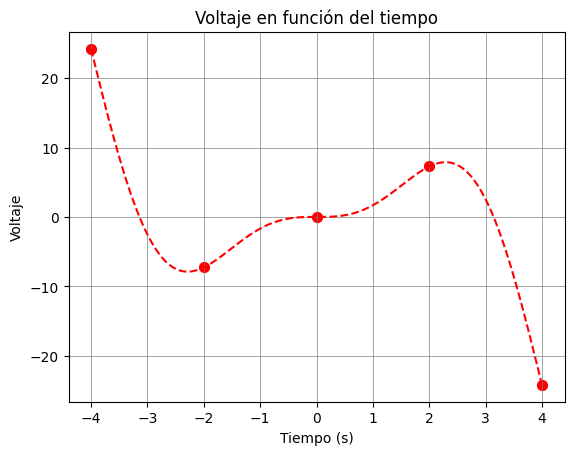

In [58]:
#creo las variables x e y según consigna 
x = np.arange(-4, 4, .01)  
y = np.sin(x)*2*x**2
#ploteo 
plt.plot(x, y, color='red', linestyle='--')
plt.title('Voltaje en función del tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje')
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')


#agrego con un for los puntos de interes pedidos en la consigna
for i in range(-4,5,2):
    y1=np.sin(i)*2*i**2
    plt.scatter( i,y1,marker='o', color='red', s=50)  


## Ejercicio 2. Dibujando varias funciones en el mismo eje
Las funciones las vamos a tomar de una librería llamada Legendre. Abajo se muestra un ejemplo en el que se grafica el 3 polinomio de Legendre entre 0 y 1.

En este problema debemos reproducir la gráfica de Wikipedia, y mejorarla agregándole título, y nombre a los ejes.

<img src="legendre.png" class="bg-primary mb-1" width="400px">

Text(0, 0.5, 'variable y')

<Figure size 300x300 with 0 Axes>

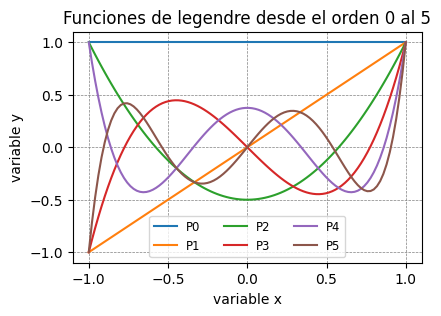

In [63]:
#se crea la distribución de puntos x según la consigna
x = np.linspace(-1,1,100)
fig = plt.figure(figsize=(3,3))
plt.figure(figsize=(4.5,3))

#realizamos un for para imprimir varias funciones, tambíen se agrega label que es el título de cada figura
for i in range(0,6,1):
    plt.plot(x,legendre(i)(x),label=f"P{i}")
    

plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.legend(loc='lower center',fontsize="small",ncol=3)
plt.title("Funciones de legendre desde el orden 0 al 5")
plt.xlabel("variable x")
plt.ylabel("variable y")

## Ejercicio 3. Dibujando varias funciones en distintos ejes
Vamos a dibujar las funciones de Wikipedia del problema anterior pero en una matriz de gráficos de:

- Seis filas y una columna, deben compartir el eje x y el espaciado debe ser mínimo.

- Tres filas y dos columnas, deben compartir los ejes x e y, y el espaciado debe ser mínimo.

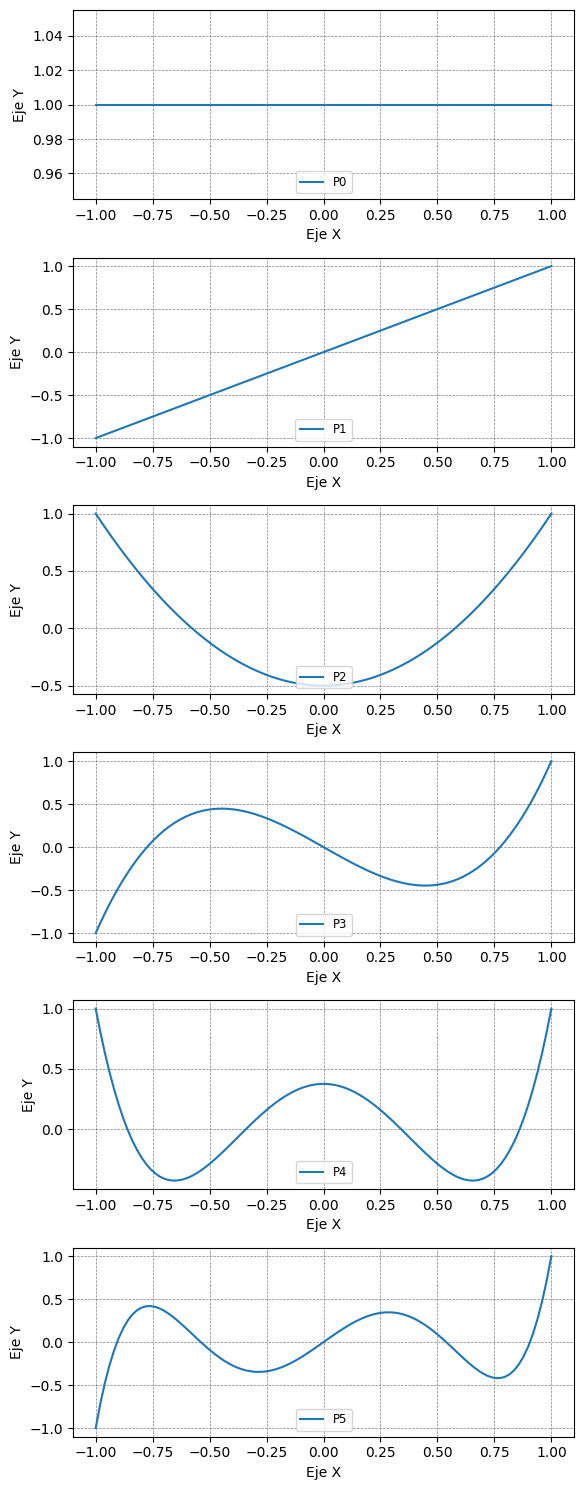

In [46]:
x = np.linspace(-1,1,100)
fig,ejes = plt.subplots(nrows=6, ncols=1, figsize=(6, 15))  # 6 filas, 1 columna

for i, (ax) in enumerate( ejes):
  y = legendre(i)(x)
  ax.plot(x, y, label=f"P{i}")
  ax.set_xlabel("Eje X")
  ax.set_ylabel("Eje Y")
  ax.legend()
  ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
  ax.legend(loc='lower center',fontsize="small",ncol=3)

plt.tight_layout()
plt.show()

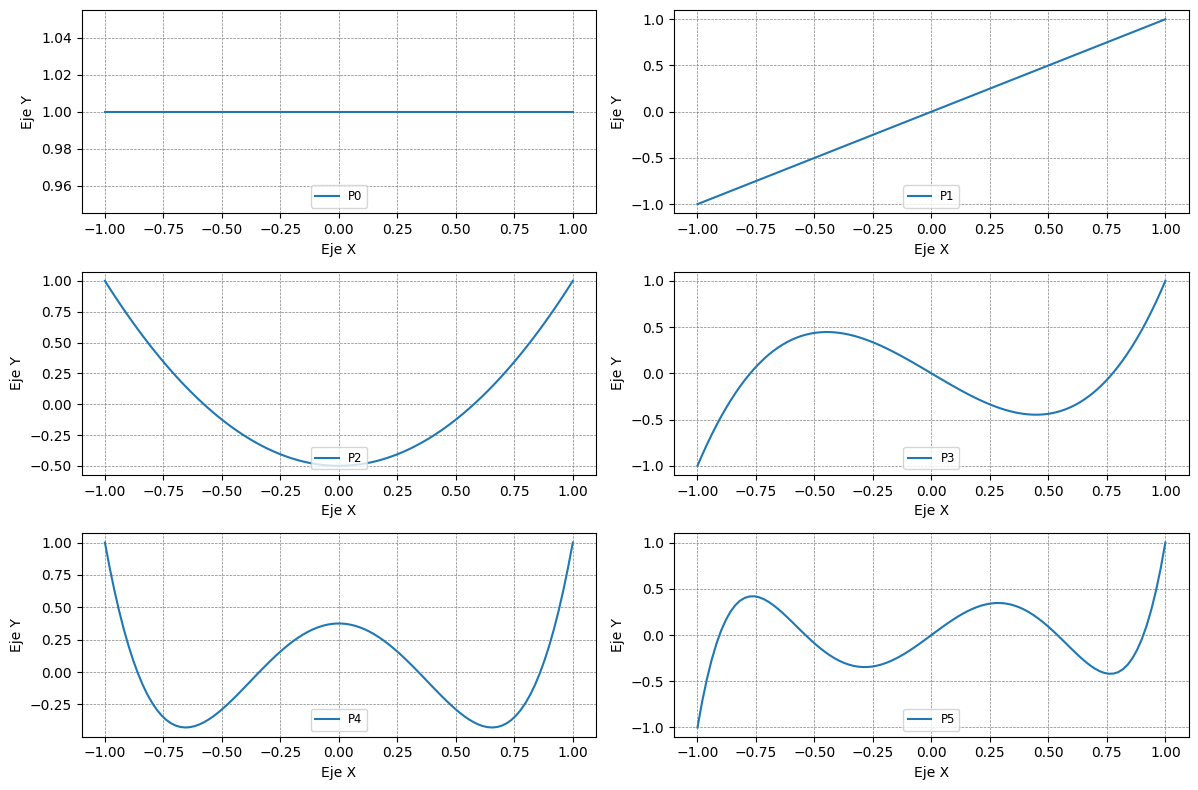

In [47]:
x = np.linspace(-1,1,100)
fig,ejes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))  # 6 filas, 1 columna

for i, (ax) in enumerate( ejes.flatten()):
  y = legendre(i)(x)
  ax.plot(x, y, label=f"P{i}")
  ax.set_xlabel("Eje X")
  ax.set_ylabel("Eje Y")
  ax.legend()
  ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
  ax.legend(loc='lower center',fontsize="small",ncol=3)

plt.tight_layout()
plt.show()


## Ejercicio 4. Análisis exploratorio

En el archivo baguette_sales.npz encontrará las ventas de baguettes de una panaderia francesa desde el 01/01/2021 hasta el 30/09/2022. Importe el archivo y analice:

1) ¿Cómo se comporta en número de clientes por día? ¿En que mes del año se venden más baguettes y es conveniente contratar más personal?
2) Analice la distribución de frecuencia del número de baguettes vendidos cada día de la semana. ¿Qué día se vendieron más baguettes?
3) Haga un boxplot del número de baguettes vendidos cada día de la semana.


1) ¿Cómo se comporta en número de clientes por día? ¿En que mes del año se venden más baguettes y es conveniente contratar más personal?

la primera fecha es: 2021-01-02 08:38:00
la ultima fecha es: 2022-09-30 12:52:00
la cantidad de días de la base de datos es: 636 days, 4:14:00


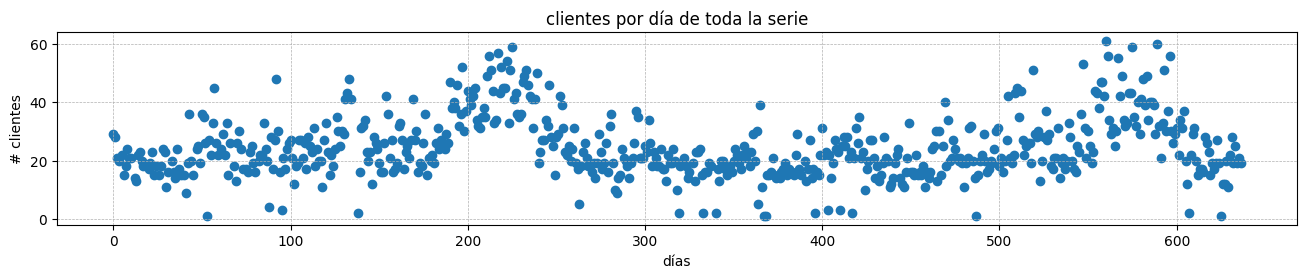

In [48]:
#carga de archivos 
baguetes_sales=np.load("baguette_sales.npz",allow_pickle=True)
data=baguetes_sales["date"]
time=baguetes_sales["time"]
quantity=baguetes_sales["quantity"].astype(int)
unit_price=baguetes_sales["unit_price"].astype(float)
#formato de datos de tiempo 
date_time=data+' '+ time
date_format = '%Y-%m-%d %H:%M'
date_time = np.array([datetime.strptime(dt, date_format) for dt in date_time])

#observamos las fechas mínimas y máximas y cantidad de días
print(f"la primera fecha es: {date_time.min()}") 
print(f"la ultima fecha es: {date_time.max()}")
print(f"la cantidad de días de la base de datos es: {(date_time.max()-date_time.min())}")

#para tener cantidad de clientes por días se realiza la resta entre la fecha minima y la fecha de cada dato, para una misma fecha darán valores iguales
#por lo que despues lo sumaremos
clientes_dia = (date_time - date_time.min()).astype('timedelta64[D]').astype(int)
dias, clientes = np.unique(clientes_dia, return_counts=True)
#dibujamos la distribución de clientes por cada día a partir del primer día

fig = plt.figure(figsize=(16,2.5))
ax = plt.gca()                  
ax.scatter(dias,clientes)
ax.set(xlabel='días',ylabel='# clientes',title='clientes por día de toda la serie') 
ax.grid(True, linestyle='--', linewidth=0.5)

In [49]:
#buscamos el día con mas clientes y la cantidad de clientes
posicion_cliente_max=np.where(clientes==clientes.max())
dia_max_clientes=dias[posicion_cliente_max]
print(f"el día con mas clientes es: {dia_max_clientes} ingresaron: {clientes.max()}")

el día con mas clientes es: [560] ingresaron: 61


El mes con más ventas es: [2021    8]
las ventas en el mes de julio y agosto se incremenan al doble por lo que se podría considerar sumar mas empleados en estos dos meses


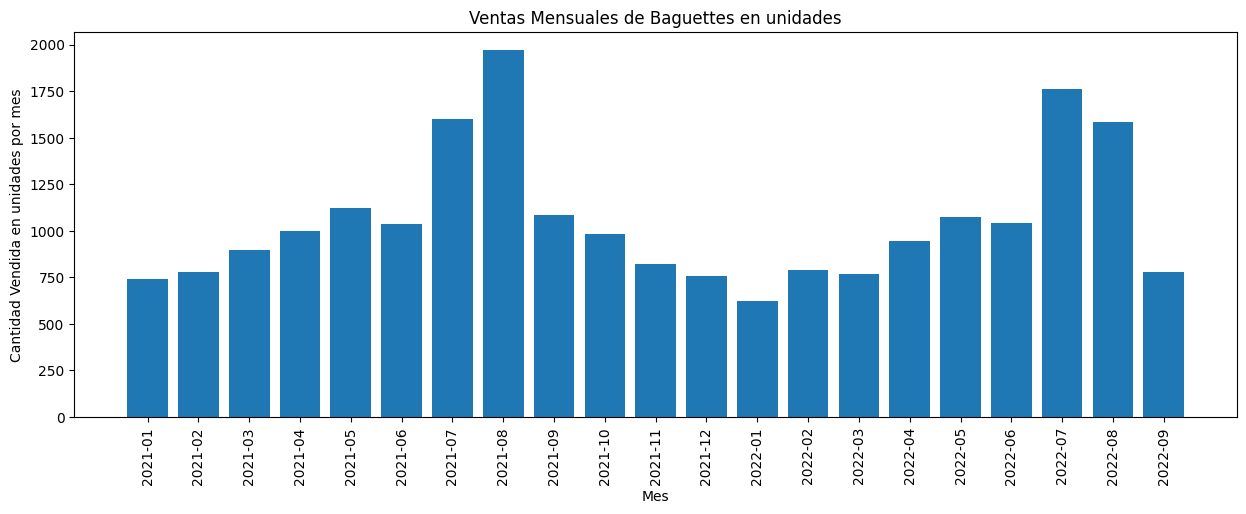

In [50]:
#analizamos la distribucion de ventas por meses
años_meses = np.array([(fecha.year,fecha.month) for fecha in date_time])
años_meses_unicos = np.unique(años_meses, axis=0)

ventas_por_mes = np.array([np.sum(quantity[(años_meses[:,0] == años) & (años_meses[:,1] == mes)]) for años, mes in años_meses_unicos])

etiquetas = [f'{año}-{mes:02d}' for año, mes in años_meses_unicos]

# Graficamos las ventas por mes
plt.figure(figsize=(15,5))
plt.bar(etiquetas,ventas_por_mes)
plt.title('Ventas Mensuales de Baguettes en unidades')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida en unidades por mes')
plt.tick_params(axis='x', rotation=90)

# Mes con más ventas
meses={1:'enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'}
print(f'El mes con más ventas es: {años_meses_unicos[np.argmax(ventas_por_mes)]}')
print("las ventas en el mes de julio y agosto se incremenan al doble por lo que se podría considerar sumar mas empleados en estos dos meses")



2) Analice la distribución de frecuencia del número de baguettes vendidos cada día de la semana. ¿Qué día se vendieron más baguettes?

El día con más ventas es: [2021    7   18] y se vendieron 105


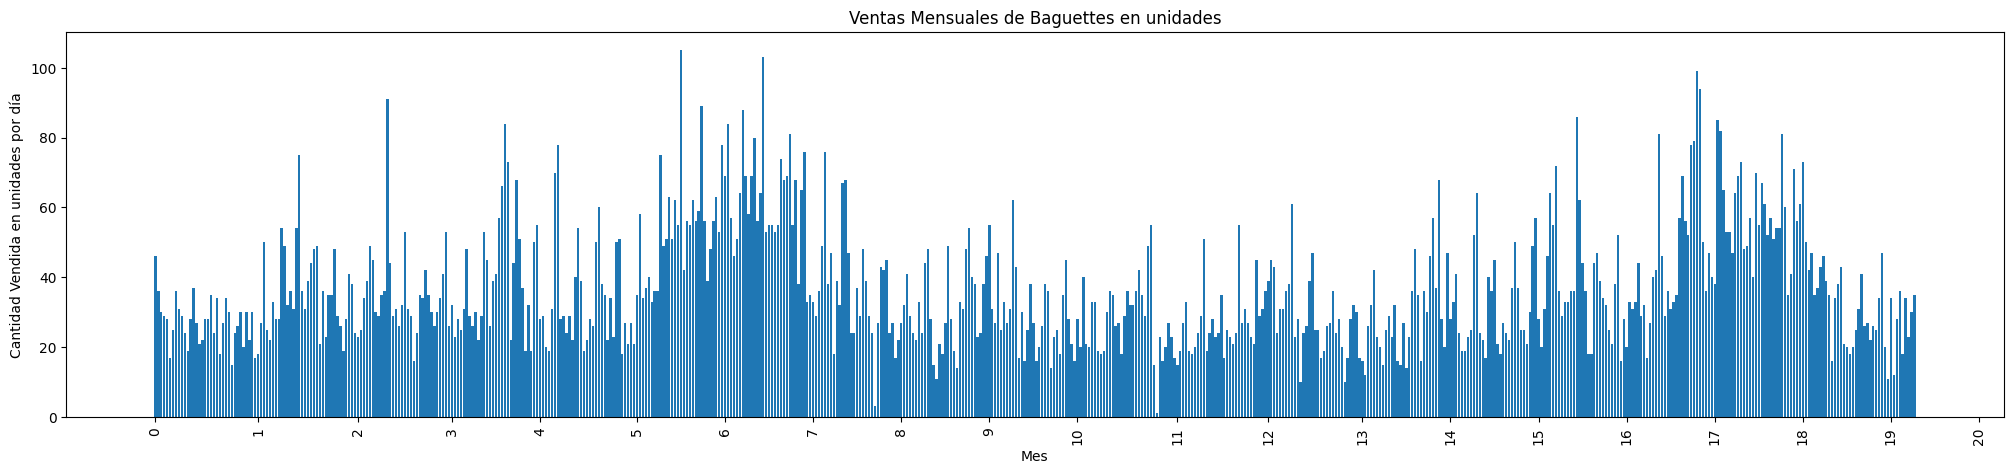

In [51]:
#analizamos la distribucion de ventas por día
años_meses_dia = np.array([(fecha.year,fecha.month,fecha.day) for fecha in date_time])
años_meses_dia_unicos = np.unique(años_meses_dia, axis=0)

ventas_por_dia = np.array([np.sum(quantity[(años_meses_dia[:,0] == años) & (años_meses_dia[:,1] == mes)& (años_meses_dia[:,2] == dia)]) for años, mes,dia in años_meses_dia_unicos])

etiquetas = [f'{año}-{mes:02d}-{dia:02d}' for año, mes,dia in años_meses_dia_unicos]

# Graficamos las ventas por dia pero en el eje x marcamos cada 30 días para que no se haga engorroso
plt.figure(figsize=(25,5))
plt.bar(etiquetas,ventas_por_dia)
plt.title('Ventas Mensuales de Baguettes en unidades')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida en unidades por día')
plt.tick_params(axis='x', rotation=90)
plt.xticks(dias[::30], range(len(dias[::30])))

# día con más ventas
print(f'El día con más ventas es: {años_meses_dia_unicos[np.argmax(ventas_por_dia)]} y se vendieron {ventas_por_dia.max()}')



Sumaremos todas las ventas por días de la semana para hacer un análisis de la semana  

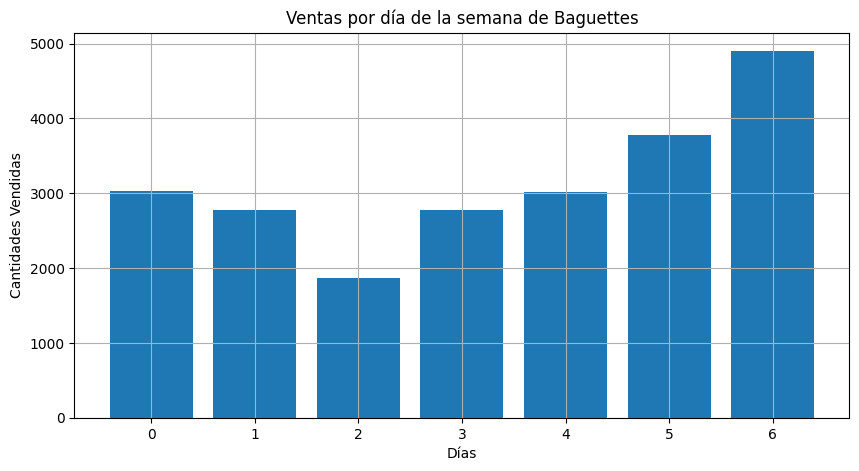

El día con más ventas es: domingo


In [52]:
# Agrupamos por día
dias = np.array([fecha.weekday() for fecha in date_time])
dias_unicos = np.unique(dias)
ventas_por_dia = np.array([np.sum(quantity[dias == dia]) for dia in dias_unicos])
# Graficamos las ventas por mes
plt.figure(figsize=(10,5))
plt.bar(dias_unicos, ventas_por_dia)
plt.title('Ventas por día de la semana de Baguettes')
plt.xlabel('Días')
plt.ylabel('Cantidades Vendidas')
plt.grid(True)
plt.show()

dia_mas_ventas = dias_unicos[np.argmax(ventas_por_dia)]
dias_semana={0:'lunes',1:'martes',2:'miercoles',3:'jueves',4:'viernes',5:'sabado',6:'domingo'}
dia_mas_ventas=dias_semana[np.argmax(ventas_por_dia)]
print(f'El día con más ventas es: {dia_mas_ventas}')

3) Haga un boxplot del número de baguettes vendidos cada día de la semana.

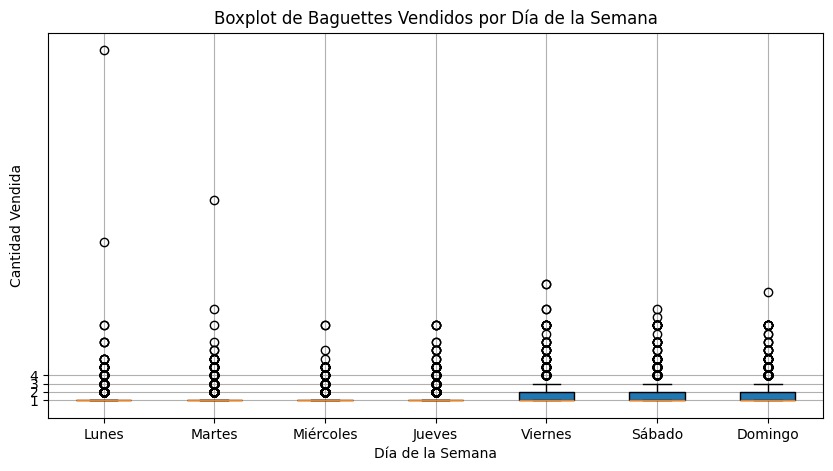

In [53]:
dias_semana = np.array([fecha.weekday() for fecha in date_time])
dias_semana_unicos = np.unique(dias_semana)
dias_semana_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
# Agrupamos las ventas por día de la semana en listas
ventas_por_dia_semana_lista = [quantity[dias_semana == dia] for dia in dias_semana_unicos]
# Hacemos el boxplot
plt.figure(figsize=(10,5))
plt.boxplot(ventas_por_dia_semana_lista, patch_artist=True)
plt.title('Boxplot de Baguettes Vendidos por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad Vendida')
plt.xticks(ticks=range(1, 8), labels=dias_semana_labels)
plt.yticks(ticks=range(1,5,1))
plt.grid(True)
plt.show()



## Ejercicio 5. Análisis de tormenta

Leer el archivo de una tormenta storm18.npz con datos de radar.  

1. Obtener los datos y comprobar que tienen una dimension de 15 tiempos en la cual cada imagen tiene 101x101 pixels correspondientes a 1km x1km cada pixel.

2. Determinar en que tiempo y posicion se encuentra el punto mas intenso de la tormenta. Que valor tiene?

3. Graficar la imagen que contiene el punto mas intenso y localizar con una X en el grafico el lugar donde se encuentra.

1. Obtener los datos y comprobar que tienen una dimension de 15 tiempos en la cual cada imagen tiene 101x101 pixels correspondientes a 1km x1km cada pixel.

<Figure size 640x480 with 0 Axes>

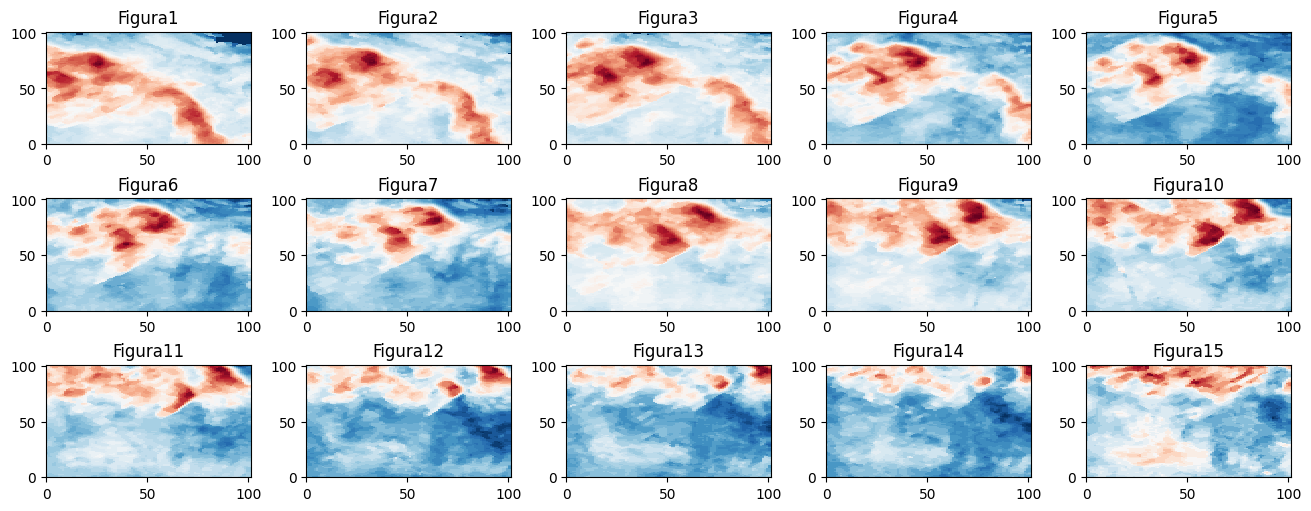

In [54]:
#carga de archivos 
tormenta=np.load("storm10.npz")

for key in tormenta:
    u=tormenta[key]

plt.set_cmap('RdBu_r') # defino el colormap para todos los graficos
fig, ax = plt.subplots(3,5,layout='constrained',figsize=(13,5))
for i, (ax) in enumerate( ax.flatten()):
    ax.pcolormesh(u[i,:,:])
    ax.set_title(f"Figura{i+1}")



  

2. Determinar en que tiempo y posicion se encuentra el punto mas intenso de la tormenta. Que valor tiene?

In [55]:
max=0
posx=0
posy=0
posz=0
for i in range(0,15,1):
    for j in range(0,101,1):
        for k in range(0,101,1):
            if max<u[i,j,k]:
                max=u[i,j,k]
                posx=k
                posy=j
                posz=i
   
print(f"el valor máximo es de: {max}")
print(f"el valor máximo se encuentra en la imagen n°: {posz+1} en el recuadro de la posx= {posx} y posy= {posy}")

#tambien podemos usar para buscar el valor máximo la siguiente formula:
u.max()




el valor máximo es de: 197
el valor máximo se encuentra en la imagen n°: 5 en el recuadro de la posx= 50 y posy= 74


197

3. Graficar la imagen que contiene el punto mas intenso y localizar con una X en el grafico el lugar donde se encuentra.

<Figure size 640x480 with 0 Axes>

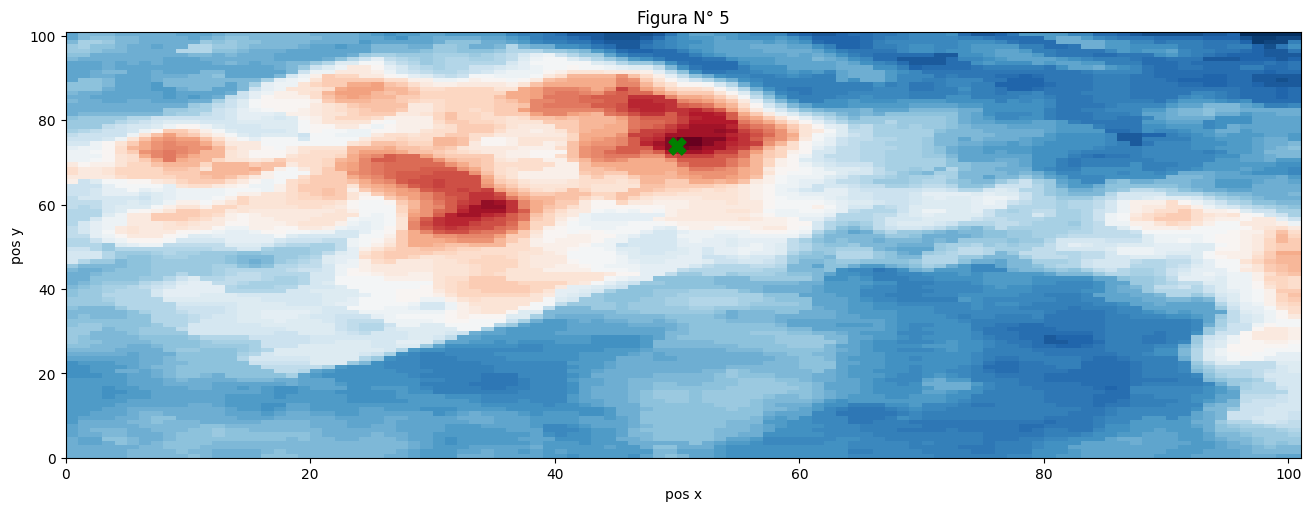

In [56]:
plt.set_cmap('RdBu_r') # defino el colormap para todos los graficos
fig, ax = plt.subplots(1,1,layout='constrained',figsize=(13,5))
ax.pcolormesh(u[4,:,:])
plt.xlabel('pos x')
plt.ylabel('pos y')
plt.title('Figura N° 5')
plt.scatter(50,74 ,marker='X', color='g', s=150)

##  Ejercicio 6. Análisis estadístico de la tormenta


Leer el archivo de una tormenta storm18.npz con datos de radar.

1. Graficar un histograma con todos los puntos.

2. Graficar en tres paneles, el histograma con todos los puntos, el histograma para el primer tiempo y el histograma para el tiempo final. 


NpzFile 'radar_data.npz' with keys: dbZ, R


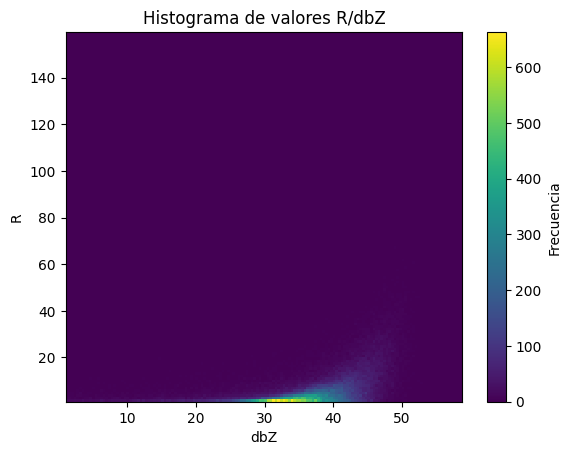

In [57]:
tormenta=np.load('radar_data.npz')
#imprimimos variables del archivo
print(tormenta)
#guardamos cada key en dos arreglos
dbZ=np.array(tormenta['dbZ'])
R=np.array(tormenta['R'])

#realizamos un histograma con todos los puntos de dbZ
plt.hist2d(dbZ, R, bins=150)
plt.xlabel("dbZ")
plt.ylabel("R")
plt.title("Histograma de valores R/dbZ")
plt.set_cmap('viridis')
plt.colorbar(label='Frecuencia')
plt.show()


